# BCB546X Python Project
## Amy Pollpeter

### Project Purpose:
The purpose of this project is to Document Dr. X's functions from the sequence_translate.py script as well as complete portions of the script that needed completion.  This project will use files obtained from the github repository that this script is contained in as well as the assignments portion of the repository for the Iowa State BCB/EEOB546X Class.

Each section will be numbered according to the function request from Dr. X.

### Load required packages
This project will require biopython.  If it is not already installed, it will need to be installed on your computer.
Specific portion of the biopython program will be imported for the functions needed in this script.
If Biopython is not already installed, due so in your terminal using the following command:
$ pip install biopython

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### 1. Obtain Sequence Function
#### Purpose:
The purpose of this function is to obtain a sequence from a file.
##### Input:
The input for this function will be the name of a fasta file in quotes.  Example: "penguins_cytb.fasta".
##### Arguments:
The input file is the only argument for this function.
##### Output:
The function will return a sequence data dictionary for the file chosen.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #Start by defining an empty data dictionary.
    for record in SeqIO.parse(fasta_fn, "fasta"): # Use a loop to fill in the data dictionary from the file.
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [3]:
# Example of using this function to show the output.
get_sequences_from_file("penguins_cytb.fasta")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

### 2. Nucleotide Translate Function
#### Purpose: 
The purpose of this function is to translate a string of nucleotides to a string of amino acids.
##### Input: 
The input for this function will be a string of nucleotides and a sring listing the name of the codon table you would like to use for the translation.  A listing of the codon tables can be found at https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi.
##### Arguments:
The string of nucleotides and the specified table will be the arguments for this function.
##### Output:
This function will return a string of amino acids using the single letter amino acid alphabet.

In [4]:
def nucl_translate_function(string_nucleotides, Codon_Table): #By specifying the table in the argument, this allows this
    # function to be used on any nucleotide string with any of the existing codon tables.
    table = CodonTable.unambiguous_dna_by_name[Codon_Table]
    aa_string = "" #start by creating an empty amino acid string
    for nucl in range(0,int(len(string_nucleotides)/3)):
        codon = string_nucleotides[3*nucl:3*nucl+3]
        if codon in ["TAG","TAA", "AGG", "AGA"]: #Telling the code to stop if it ecounters a stop codon.
            return aa_string
        table.forward_table[codon] #Translating each codon to the accompanying amino acid.
        aa_string = aa_string + table.forward_table[codon] # Adding each new codon to the amino acid string.
    return aa_string

In [5]:
#Checking to see if the function works correctly using both a sring of nucleotides, and a sequence saved to a variable.
print(nucl_translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC", "Vertebrate Mitochondrial"))
AF_seq_part = Af_seq_part = "ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC" 
print(nucl_translate_function(AF_seq_part, "Vertebrate Mitochondrial"))

MAPNLRKSHPLLKMINNS
MAPNLRKSHPLLKMINNS


### 3. Alternative Translate Function
#### Purpose:
There is a more eficient way to write the Translate function using an existing function (translate) in the biopython library.
This function ustilizes that existing biopython function.
##### Input:
The input for this function will be a string of nucleotides, just as in the Nucleotide Translate Function.
##### Arguments:
In addition to the nucleotide sequence, this function will need two additional arguments:  
alphabet: The alphabet that is being used for the nucleotide string (generic_dna, RNAAlphabet, or DNAAlphabet).
Either a string specifying the NCBI table (i.e. "Standard", "Vertebrate Mitochondrial", "Bacterial") or an integer specifying the NCBI table by number.  The full list of available options can be found at the following website: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi.
##### Output:
This funtion returns a string of amino acids symbolized by a single letter followed by a comma and the alphabet used for the string.  If a stop codon is present translation will stop at that codon and will not return anything further in the sequence.

In [6]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
def alt_translate_function(string_nucleotides, alphabet, table):
    coding_seq = Seq(string_nucleotides, alphabet)
    aa_string = coding_seq.translate(table = table, to_stop=True)
    return str(aa_string)

In [7]:
# Check to see if the function works on both our sequence saved to a variable name and a string of nucleotiedes.
print(alt_translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC", generic_dna, 2))
print(alt_translate_function(Af_seq_part, generic_dna, 2))

MAPNLRKSHPLLKMINNS
MAPNLRKSHPLLKMINNS


### 4. Amino Acid Count Analysis Function
#### Purpose:
This function will calculate the weight of an amino acid sequence.
##### Input:
The input for this function will be a string of single letters symbolizing the amino acid.
##### Arguments:
##### Output:
The output for this function will be a integer stating the molecular weight of the amino acid sequence.

In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_wt(aa_string):
    analyzed_seq = ProteinAnalysis(aa_string)
    mol_weight = analyzed_seq.molecular_weight()
    return mol_weight

In [9]:
#Testing the function using our sequence from above.
compute_molecular_wt(Af_seq_part)

4783.6891

### 5. Sequence GC Content Analysis Function
#### Purpose:
The purpose of this function is to calculate the GC Content (proportion of G and C in each DNA sequence) and returns the value.
##### Input:
The input for this function will be a DNA sequence as a string of nucleotides.
##### Arguments:
The only argument for this function is the DNA sequence as a string.
##### Output:
The output for this function will be an integer stating the GC content as a percentage.

In [10]:
from Bio.SeqUtils import GC
def GC_content(string_nucleotides):
    return GC(string_nucleotides)
    

In [11]:
print(GC_content("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC"))
print(GC_content(AF_seq_part))

40.74074074074074
40.74074074074074


### A Note about the GC Content Analysis Function:
This function is really just renaming an already existing function within the Biopython package SeqUtils.  As you can see in the code above, the code is simply giving a new name to call the Biopython function.  A simpler way to perform this is to use the Biopython function already created (why reinvent the wheel!).  To do this, you would simply use the function GC(string_nucleotides).  In the block below, you will see that I have used called the exact same commands as I did to show the created GC function, however, I have replaced the created GC function (GC_content) with the existing one (GC).

In [12]:
print(GC("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC"))
print(GC(AF_seq_part))

40.74074074074074
40.74074074074074


### 6. Add two new columns to Penguins Dataframe
#### Purpose:
The purpose of this code wil be to add to addtional columns to the penquins dataframe to report the molecular weight and GC Content.  Currently the dataframe only reports the mass.

In [13]:
#Start by reading in the dataframe
penguins_Cytb_df = pd.read_csv("penguins_mass.csv")
penguins_Cytb_df #Examine the Dataframe to see what it currently contains.

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [14]:
penguins_Cytb_df['Mol_Weight'] = '' # Adding an empty column for Molecular Weight
penguins_Cytb_df['GC_Content'] = '' # Adding an empty column for GC Content
penguins_Cytb_df

,species,mass,Mol_Weight,GC_Content
0,Aptenodytes forsteri,28.00,,
1,Aptenodytes patagonicus,13.40,,
2,Eudyptes chrysocome,2.80,,
3,Eudyptes chrysolophus,4.50,,
4,Eudyptes sclateri,4.25,,
5,Eudyptula minor,1.60,,
6,Pygoscelis adeliae,4.60,,
7,Pygoscelis antarctica,4.10,,
8,Pygoscelis papua,6.10,,
9,Spheniscus demersus,3.20,,


### 7. Write a For-Loop to translate each sequence and obtain the molecular weight and GC Content and add data to dataframe.
#### Purpose:
The purpose of this function will be the main method of the script.  It will import the sequences from the file, translate them to amino acid sequences, computer the molecular weight of the amino acid sequence, calculate the GC content of the DNA sequence, add create a dataframe containing the species name, the mass, the molecular weight and the GC content for the CytB seequence for each species.
##### Input: 
The input for this function will a fasta formatted file containing the sequences we want to analyze.
##### Arguments: 
Other arguments for this function will be the type of alphabet needed for the sequences and the type of translation table needed to translate the sequences.
##### Output:
The output of this sequence will be a data frame containing the species name and its associated mass, the molecular weight of the Cytb amino acid sequence and the GC content of the CytB DNA sequence. 

In [15]:
cytb_seqs = get_sequences_from_file("penguins_Cytb.fasta") 

In [16]:
from Bio.SeqUtils import GC
for i, value in cytb_seqs.items(): 
    penguins_seq = str(cytb_seqs[i])
    aa_seq = alt_translate_function(penguins_seq, generic_dna, 2)
    mol_wt = compute_molecular_wt(aa_seq)
    penguins_Cytb_df.loc[penguins_Cytb_df.species == i,'Mol_Weight'] = mol_wt
    GC_cont = GC(penguins_seq)
    penguins_Cytb_df.loc[penguins_Cytb_df.species == i,'GC_Content'] = GC_cont
print(penguins_Cytb_df)
    


                    species   mass Mol_Weight GC_Content
0      Aptenodytes forsteri  28.00    42459.6    48.3815
1   Aptenodytes patagonicus  13.40    42563.7    49.6938
2       Eudyptes chrysocome   2.80    42475.6    51.1811
3     Eudyptes chrysolophus   4.50    42445.5    50.9186
4         Eudyptes sclateri   4.25    42475.6    50.8311
5           Eudyptula minor   1.60    42491.6    49.2563
6        Pygoscelis adeliae   4.60    42458.6    49.0814
7     Pygoscelis antarctica   4.10    42404.5     47.769
8          Pygoscelis papua   6.10    42595.9    47.1566
9       Spheniscus demersus   3.20    42431.5     48.294
10     Spheniscus humboldti   4.75    42399.6    49.2563
11  Spheniscus magellanicus   3.40    42459.6    48.2065


### 8. Bar Chart of Mass vs. Species Name
For visualizing data, if you have not already installed the Seaborn program, you will need to do this first using:
conda install seaborn.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

[Text(0, 0, 'Aptenodytes forsteri'),
 Text(0, 0, 'Aptenodytes patagonicus'),
 Text(0, 0, 'Eudyptes chrysocome'),
 Text(0, 0, 'Eudyptes chrysolophus'),
 Text(0, 0, 'Eudyptes sclateri'),
 Text(0, 0, 'Eudyptula minor'),
 Text(0, 0, 'Pygoscelis adeliae'),
 Text(0, 0, 'Pygoscelis antarctica'),
 Text(0, 0, 'Pygoscelis papua'),
 Text(0, 0, 'Spheniscus demersus'),
 Text(0, 0, 'Spheniscus humboldti'),
 Text(0, 0, 'Spheniscus magellanicus')]

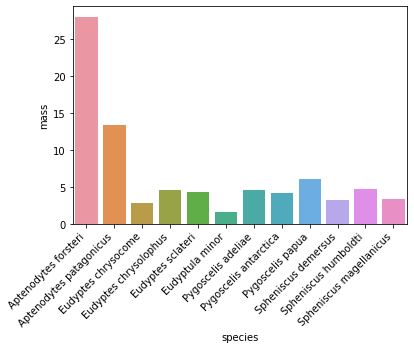

In [19]:
# Dr X's request was to plot a bar-chart of the mass with the x-axes labeled with species names.
species_mass = sns.barplot(x = "species", y = "mass", data = penguins_Cytb_df)
species_mass.set_xticklabels(species_mass.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

While this plot works, it may work even better to flip the axes so the mass is along the x-axis.  This also will eliminate the need to rotate our x-axis labels.

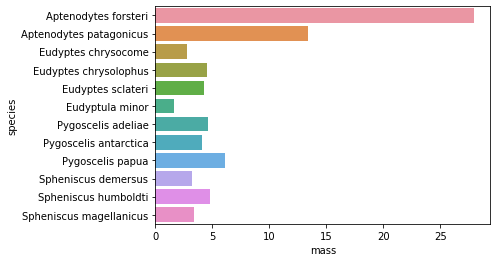

In [20]:
sns.barplot(x = "mass", y = "species", data = penguins_Cytb_df)

### Questions:
#### *Q1* What is the smallest penguin species? 
The smallest penguin species is Eudyptula minor.
#### *Q2* What else is interesting about this species?
I don't see anything else interesting about this species on this graph.  A quick google search and look at the Wikipedia page for this species reveals that their common name is appropriately "Little Penguin."  In addition, in Australia, they are referred to as "Fairy Penguins".  https://en.wikipedia.org/wiki/Little_penguin

### 9. Plot molecular weight vs. GC Content


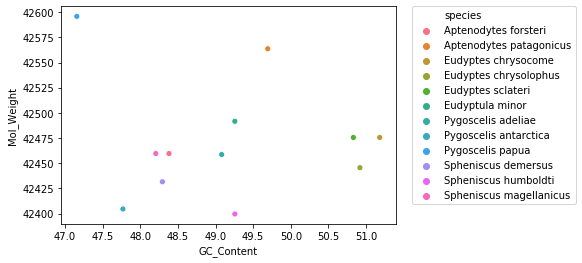

In [21]:
molwt_gc = sns.scatterplot(x= "GC_Content", y = "Mol_Weight", data = penguins_Cytb_df, hue = "species")
molwt_gc.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Originally the legend covered up most of the figure, 
# I found this line of code on Stack Overflow to move the legend outside of the figure.  
# https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

### 10. Save dataframe as a new file


In [22]:
penguins_Cytb_df.to_csv("penguins_mass_cytb.csv")

### 11. Bonus:
#### What else can we do with this dataset in Python? 
There are many things we can do with this dataset in Python.  Obviously, we can visualize the data in many different ways (see below for a few examples).  In addition, using Biopython, we can compare sequences to each other to look for similarities or differences.  In this case, since these are all sequences for CytB in the same type of animal (penguins) we would expect them to be fairly similar, so we would probably want to look for differences.
#### Add functions or anything that might be interesting and fun. (optional)
Below, you will see a few different options for visualizations of the data.

#### Molecular Weight vs GC Content, with species and mass indications.

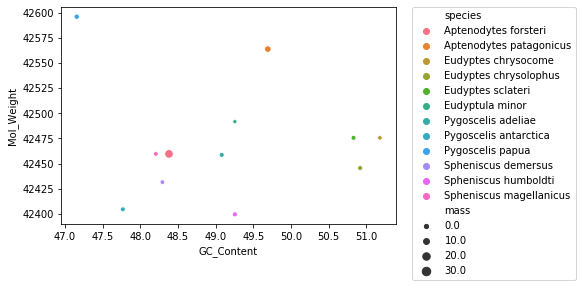

In [23]:
### Recreating the Molecular Weight vs GC Content, but adding in Mass denoted by the size of the dot.
molwt_gc = sns.scatterplot(x= "GC_Content", y = "Mol_Weight", data = penguins_Cytb_df, hue = "species", size = "mass")
molwt_gc.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### An example of using BIopython for sequence alignment
The code below shows an example of using biopython to compare sequences.  As you can see, this produces a pretty large output with sequences of the length that we have in the CytB file.  There are other alignment programs that may be able to show this better, but this is an example of what can be done.

More information about this module can be found on the biopython tutorial webpage found here:
https://www.tutorialspoint.com/biopython/biopython_sequence_alignments.htm

In [24]:
#Import the alignment modules from Biopython.
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# Define two sequences.  It would take up far too much space to do an iterative loop through all the sequences.
# Because our sequences are fairly long, we are going to call in the sequences, but then only do an alignment on the first 20
# bp of the sequence.
AF_seq = cytb_seqs['Aptenodytes forsteri'] # I chose this species because it is the largest.
EM_seq = cytb_seqs['Eudyptula minor'] # I chose this species because it is the smallest.
AF_seq_part = AF_seq[0:19]
EM_seq_part = EM_seq[0:19]
# Run a global alignment of the two sequences with no parameters, no gap penalties.
alignments = pairwise2.align.localxx(AF_seq_part, EM_seq_part)
for a in alignments:
    print(format_alignment(*a))


ATGGCCCCA-AATC-TCCGAA
||||||||  || | ||||||
ATGGCCCC-CAA-CCTCCGAA
  Score=17

ATGGCCCCAAATC-TCCGAA
||||||||.|| | ||||||
ATGGCCCCCAA-CCTCCGAA
  Score=17

ATGGCCC-CAAATC-TCCGAA
||||||| | || | ||||||
ATGGCCCCC-AA-CCTCCGAA
  Score=17

ATGGCC-CCAAATC-TCCGAA
|||||| || || | ||||||
ATGGCCCCC-AA-CCTCCGAA
  Score=17

ATGGC-CCCAAATC-TCCGAA
||||| ||| || | ||||||
ATGGCCCCC-AA-CCTCCGAA
  Score=17

ATGG-CCCCAAATC-TCCGAA
|||| |||| || | ||||||
ATGGCCCCC-AA-CCTCCGAA
  Score=17

ATGGCCCC-AAATC-TCCGAA
|||||||| | | | ||||||
ATGGCCCCCA-A-CCTCCGAA
  Score=17

ATGGCCC-CAAATC-TCCGAA
||||||| || | | ||||||
ATGGCCCCCA-A-CCTCCGAA
  Score=17

ATGGCC-CCAAATC-TCCGAA
|||||| ||| | | ||||||
ATGGCCCCCA-A-CCTCCGAA
  Score=17

ATGGC-CCCAAATC-TCCGAA
||||| |||| | | ||||||
ATGGCCCCCA-A-CCTCCGAA
  Score=17

ATGG-CCCCAAATC-TCCGAA
|||| ||||| | | ||||||
ATGGCCCCCA-A-CCTCCGAA
  Score=17

ATGGCCCC-AAATC-TCCGAA
|||||||| ||  | ||||||
ATGGCCCCCAA--CCTCCGAA
  Score=17

ATGGCCC-CAAATC-TCCGAA
||||||| |||  | ||||||
ATGGCCCCCAA--CCTCCGAA
 

#### As an alternative, we can also use the protein sequence (or a portion of it) for the alignment.

In [25]:
# Obtain our sequences
AF_seq = cytb_seqs['Aptenodytes forsteri']
EM_seq = cytb_seqs['Eudyptula minor']
# Translate them to amino acid sequences
AF_aa_seq = alt_translate_function((str(AF_seq)), generic_dna, 2)
EM_aa_seq = alt_translate_function((str(EM_seq)), generic_dna, 2)
# Shorten the amino acid sequences to the first 50 amino acids for the sake of space.
AF_aa_seq_part = AF_aa_seq[0:49]
EM_aa_seq_part = EM_aa_seq[0:49]
# Run a global alignment of the two sequences with no parameters, no gap penalties.
alignments = pairwise2.align.localxx(AF_aa_seq_part, EM_aa_seq_part)
for a in alignments:
    print(format_alignment(*a))

MAPNLRKSHPLLKMINNSLIDLPTPSNISA-WWNFGSLLGICLT-TQILTG
|||||||||||||||||||||||||||||  ||||||||||||  ||||||
MAPNLRKSHPLLKMINNSLIDLPTPSNIS-TWWNFGSLLGICL-ITQILTG
  Score=47

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLT-TQILTG
|||||||||||||||||||||||||||||.||||||||||||  ||||||
MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICL-ITQILTG
  Score=47

MAPNLRKSHPLLKMINNSLIDLPTPSNISA-WWNFGSLLGICLTTQILTG
|||||||||||||||||||||||||||||  ||||||||||||.||||||
MAPNLRKSHPLLKMINNSLIDLPTPSNIS-TWWNFGSLLGICLITQILTG
  Score=47

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTG
|||||||||||||||||||||||||||||.||||||||||||.||||||
MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQILTG
  Score=47

MAPNLRKSHPLLKMINNSLIDLPTPSNISA-WWNFGSLLGICL-TTQILTG
|||||||||||||||||||||||||||||  |||||||||||| | |||||
MAPNLRKSHPLLKMINNSLIDLPTPSNIS-TWWNFGSLLGICLIT-QILTG
  Score=47

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICL-TTQILTG
|||||||||||||||||||||||||||||.|||||||||||| | |||||
MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLIT-QILTG
  Score=47

